# Practical tasks

##### Please explore the datasets and answer the questions below.
##### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.cluster import KMeans
# you will need to import more libraries as needed
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Clustering tasks

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem `shopping-data.csv`

#### 1. Load the data and preview

In [73]:
customer_data = pd.read_csv('shopping-data.csv')

In [74]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. Plot scatter plot for annual income and spending score which will be used for clustering in the next steps

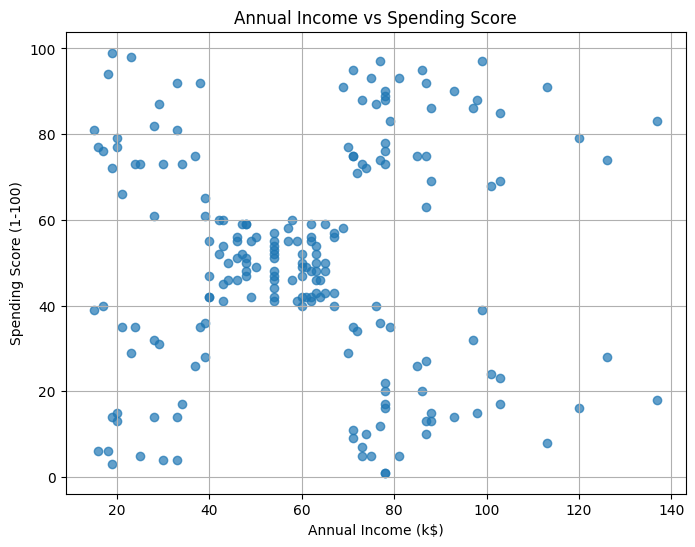

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.grid(True)
plt.show()

#### 3. Normalize the data

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

#### 4. Use Elbow method to decide number of clusters

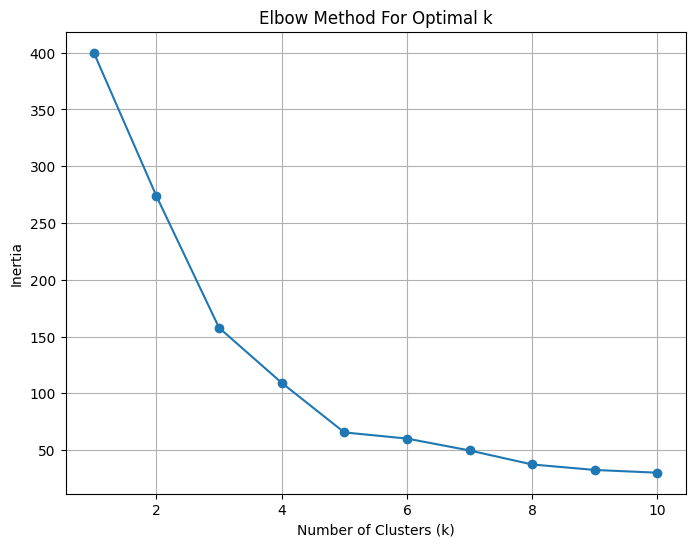

In [78]:
# Find the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

#### 5. Perform Clustering using KMeans

In [79]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
customer_data['Cluster'] = clusters
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


#### 6. Plot scatter plot and color code in clustered groups

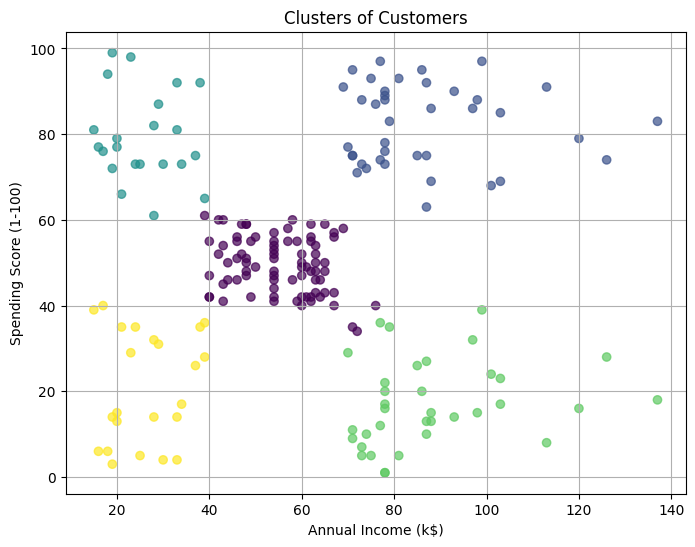

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c=customer_data['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.grid(True)
plt.show()

#### 7. Plot dendrogram to decide number of clusters for Hierarchical Clustering. <br> Explain (free text in a markdown cell) what is the optimal number of clusters and why

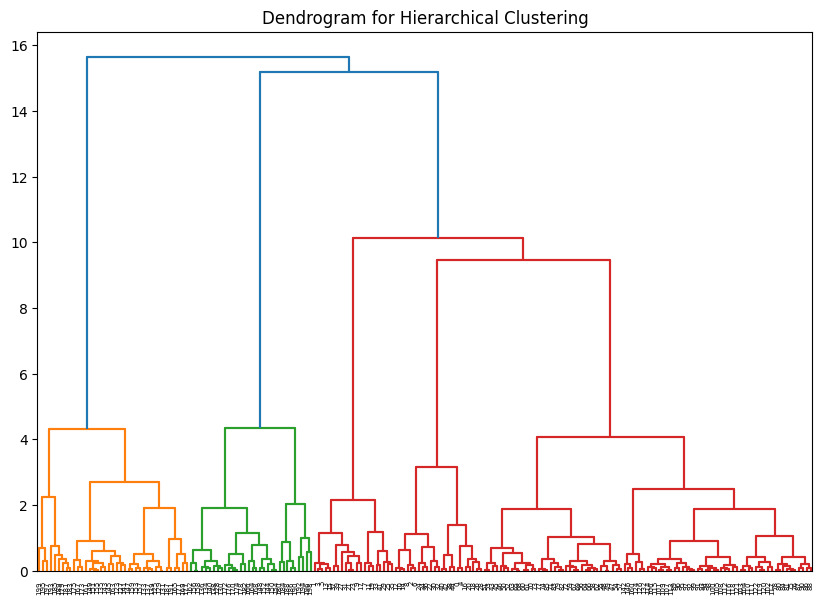

In [81]:
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

Optimal number is approximately 15.8 because the optimal number of clusters is where the dendrogram shows the biggest jump in distance just before the longest vertical line. 

#### 8. Do clustering using Hierarchical Clustering

In [82]:
clusters_hier = fcluster(linked, 5, criterion='maxclust')
customer_data['HierCluster'] = clusters_hier
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,HierCluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,4,4


#### 9. Plot scatter plot and color code in clustered groups

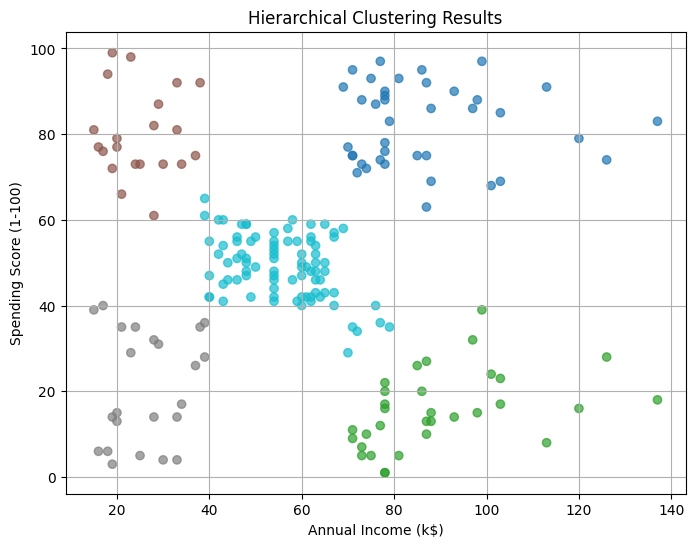

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c=customer_data['HierCluster'], cmap='tab10', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering Results')
plt.grid(True)
plt.show()

####  10. Do KMeans and DBSCAN clustering on this data

In [84]:
from sklearn.datasets import make_moons
#moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples=2000)

Text(0.5, 1.0, 'Half Moons')

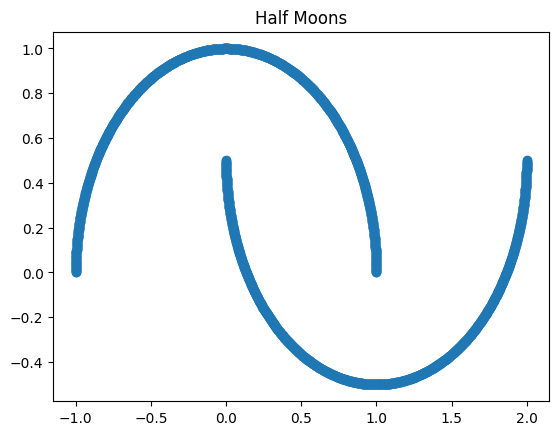

In [85]:
plt.scatter(moons_X[:,0],moons_X[:,1])
plt.title('Half Moons')

#### Using KMeans (do clustering and plot results (each cluster in own color))

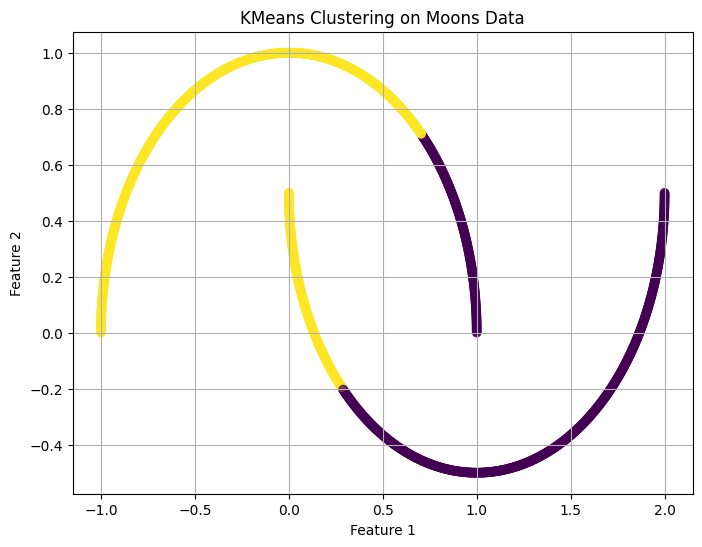

In [86]:
# KMeans clustering for moons dataset
kmeans_moons = KMeans(n_clusters=2, random_state=42)
moons_clusters = kmeans_moons.fit_predict(moons_X)
plt.figure(figsize=(8,6))
plt.scatter(moons_X[:,0], moons_X[:,1], c=moons_clusters, cmap='viridis', alpha=0.7)
plt.title('KMeans Clustering on Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

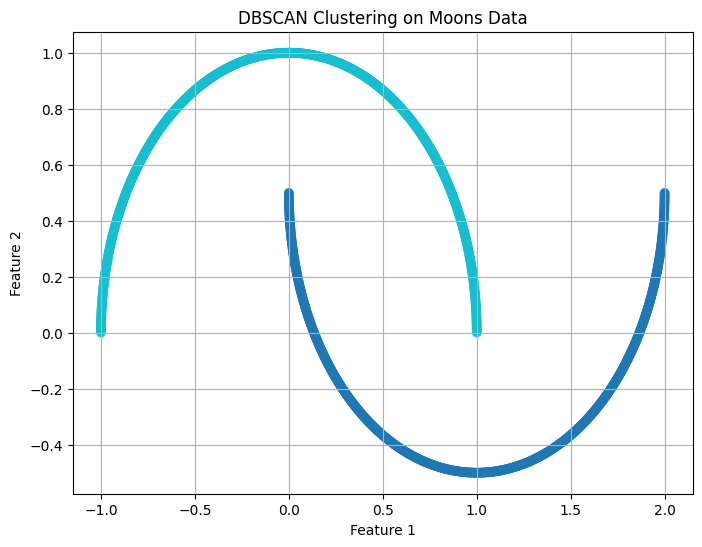

In [87]:
# DBSCAN clustering for moons dataset
dbscan = DBSCAN(eps=0.3, min_samples=5)
moons_dbscan = dbscan.fit_predict(moons_X)

plt.figure(figsize=(8,6))
plt.scatter(moons_X[:,0], moons_X[:,1], c=moons_dbscan, cmap='tab10', alpha=0.7)
plt.title('DBSCAN Clustering on Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

#### 11. Using DBSCAN do clustering and plot results (each cluster in own color). Find the most suitable eps and minimal samples number

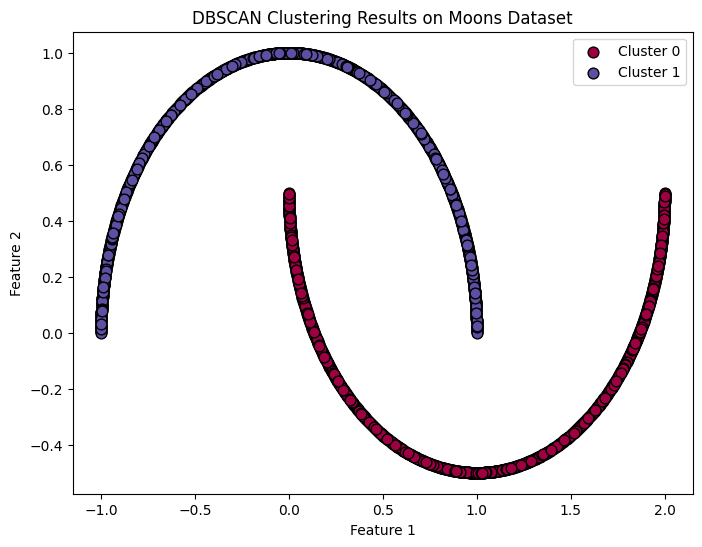

In [88]:
# Scatter plot for DBSCAN clustering results on moons dataset
plt.figure(figsize=(8, 6))
unique_labels = set(moons_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (moons_dbscan == k)
    xy = moons_X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise', edgecolor='k', s=60)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Results on Moons Dataset')
plt.legend()
plt.show()

eps=0.25and min_samples=5

#### 12. Compare the results of K-means and DBSCAN clustering
Explain why one or another is prefferable for such dataset, and differences if any.

KMeans splits the moons data with straight boundaries mixing points from different shapes. DBSCAN correctly finds the two curved clusters, handling complex shapes and noise. For this dataset DBSCAN is more accurate and suitable than KMeans.

### Perform PCA on penguins :)
###### This section uses kaggle dataset (https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)
###### The tasks below include data analysis, data preprocessing, PCA, and application of classification to predict the target

#### 13. Describe the data. Do any additional exporations as you feel

In [89]:
# Dataset
penguins = pd.read_csv('penguins.csv')
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [107]:
# decribe the data, its size
penguins.shape  
penguins.info() 
penguins.head()  
penguins.describe()  

<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    str    
dtypes: float64(4), str(1)
memory usage: 13.6 KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


#### Based on dataframe describe, in own words explain any abnormal characteristics 

The flipper_length_mm column has negative and very large values, which are unrealistic. These should be cleaned before analysis. Other columns look normal.

#### 14. Explore corrupted data

In [91]:
# find missing values. print entries with missing values, provide shape
missing_rows = penguins[penguins.isnull().any(axis=1)]
print(missing_rows)
print("Number of rows with missing values:", missing_rows.shape[0])

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3                 NaN              NaN                NaN          NaN  NaN
8                34.1             18.1              193.0       3475.0  NaN
10               37.8             17.1              186.0       3300.0  NaN
11               37.8             17.3              180.0       3700.0  NaN
47               37.5             18.9              179.0       2975.0  NaN
246              44.5             14.3              216.0       4100.0  NaN
286              46.2             14.4              214.0       4650.0  NaN
324              47.3             13.8              216.0       4725.0  NaN
339               NaN              NaN                NaN          NaN  NaN
Number of rows with missing values: 9


In [92]:
# Examine sex column
print(penguins['sex'].unique())  
print("Number of missing values in 'sex':", penguins['sex'].isnull().sum())
print(penguins[penguins['sex'].isnull()])  

<StringArray>
['MALE', 'FEMALE', nan, '.']
Length: 4, dtype: str
Number of missing values in 'sex': 9
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3                 NaN              NaN                NaN          NaN  NaN
8                34.1             18.1              193.0       3475.0  NaN
10               37.8             17.1              186.0       3300.0  NaN
11               37.8             17.3              180.0       3700.0  NaN
47               37.5             18.9              179.0       2975.0  NaN
246              44.5             14.3              216.0       4100.0  NaN
286              46.2             14.4              214.0       4650.0  NaN
324              47.3             13.8              216.0       4725.0  NaN
339               NaN              NaN                NaN          NaN  NaN


In [93]:
# find any unusual values. Print anomal rows
anomal_flipper = penguins[(penguins['flipper_length_mm'] <= 0) | (penguins['flipper_length_mm'] > 1000)]
print(anomal_flipper)

anomal_mass = penguins[(penguins['body_mass_g'] < 1000) | (penguins['body_mass_g'] > 7000)]
print(anomal_mass)

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE
Empty DataFrame
Columns: [culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


#### 15. Based on observations above, prepare the data for PCA. Only valid rows should be present. <br> Preview dataframe, show its size

In [94]:
# clean
penguins_clean = penguins.dropna()  # Remove rows with missing values
penguins_clean = penguins_clean[(penguins_clean['flipper_length_mm'] > 0) & (penguins_clean['flipper_length_mm'] < 1000)]
penguins_clean = penguins_clean[(penguins_clean['body_mass_g'] >= 1000) & (penguins_clean['body_mass_g'] <= 7000)]

penguins_clean.head() 
penguins_clean.shape   

(333, 5)

In [95]:
# scale numerical columns. assign to a variable X_penguins
from sklearn.preprocessing import StandardScaler

numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
X_penguins = scaler.fit_transform(penguins_clean[numerical_cols])


In [96]:
# assign categorical column to a variable y_penguins
print(penguins_clean.columns)  
y_penguins = penguins_clean['sex']  

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='str')


#### 15. Explain the chosen null values handling strategy, how it affects the dataset (+/-)

Missing values weree removed from the dataset. This ensures data quality but reduces the sample size which may affect model performance.

#### 16. Perform PCA with 2 components. Plot the results 

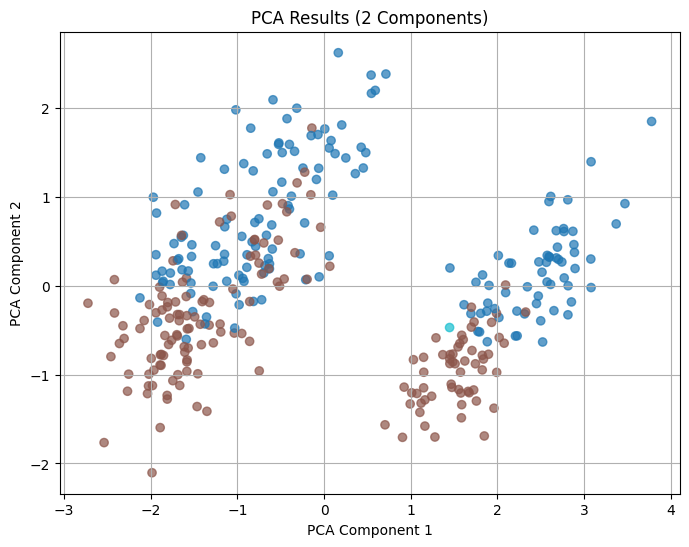

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_penguins_pca = pca.fit_transform(X_penguins)

plt.figure(figsize=(8,6))
plt.scatter(X_penguins_pca[:,0], X_penguins_pca[:,1], c=pd.factorize(y_penguins)[0], cmap='tab10', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Results (2 Components)')
plt.grid(True)
plt.show()

#### 17. Display scree plots to determine the optimal number of components and cumulative explained variance

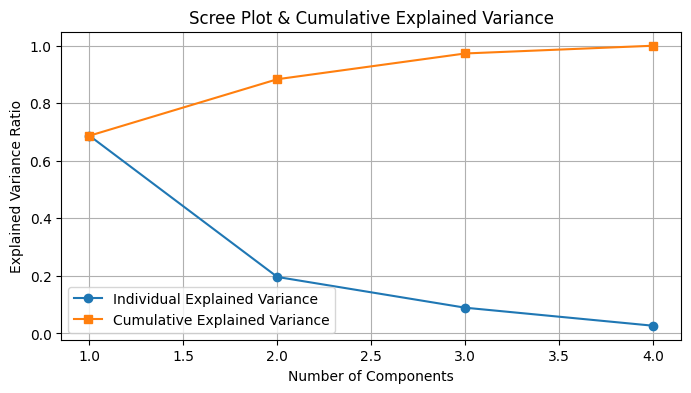

In [98]:
pca_full = PCA()
pca_full.fit(X_penguins)

explained_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cum_var)+1), cum_var, marker='s', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

#### 18. Calculate (show in numbers) and display component loadings

In [99]:
# Component loadings (how much each original feature contributes to each PC)
loadings = pca.components_.T 
feature_names = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Showing loadings for first 2 components
loadings_df = pd.DataFrame(loadings[:, :2], index=feature_names, columns=['PC1', 'PC2'])
print(loadings_df)

                        PC1       PC2
culmen_length_mm   0.452718  0.606746
culmen_depth_mm   -0.399011  0.791666
flipper_length_mm  0.576838  0.003161
body_mass_g        0.550540  0.071521


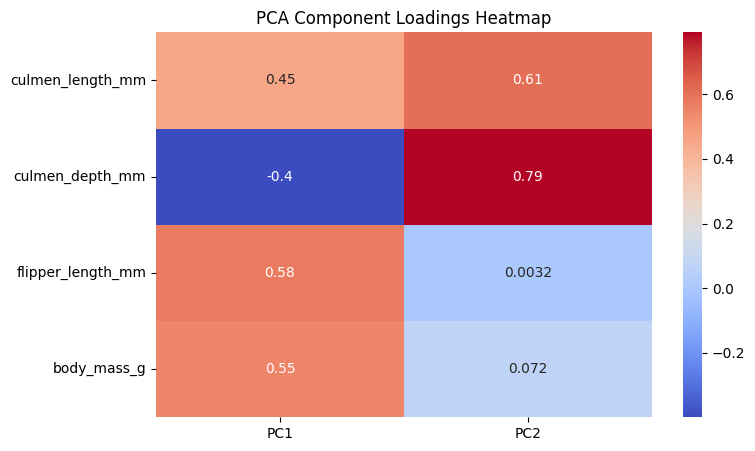

In [100]:
# show heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Component Loadings Heatmap')
plt.show()

#### 19. Perform logistic regression (or any other classification algorithm) and evaluate the model

In [101]:
# import necessary libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Use the PCA-transformed data (X_penguins_pca) and true labels (y_penguins)
le = LabelEncoder()
y_penguins_encoded = le.fit_transform(y_penguins)

# Remove classes with less than 2 samples (required for stratified split)
unique, counts = np.unique(y_penguins_encoded, return_counts=True)
valid_classes = unique[counts >= 2]
valid_idx = np.isin(y_penguins_encoded, valid_classes)
X_valid = X_penguins_pca[valid_idx]
y_valid = y_penguins_encoded[valid_idx]

# Train and evaluate a model
X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=42, stratify=y_valid)
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_[valid_classes]))

Accuracy: 0.8208955223880597
              precision    recall  f1-score   support

      FEMALE       0.89      0.73      0.80        33
        MALE       0.78      0.91      0.84        34

    accuracy                           0.82        67
   macro avg       0.83      0.82      0.82        67
weighted avg       0.83      0.82      0.82        67



The model performs well and is reliable for predicting penguin sex after PCA. Both classes are well represented and the results are satisfactory for this task.

#### 20. Train the model on all data points, and determine penguin sex for the data, where it was not originally identified

In [103]:
# 1. take entries from original data without sex, scale numerical columns
penguins_missing_sex = penguins[penguins['sex'].isnull()]
print(f"Number of rows with missing sex: {penguins_missing_sex.shape[0]}")

numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X_missing = scaler.transform(penguins_missing_sex[numerical_cols])
X_missing

Number of rows with missing sex: 9


array([[        nan,         nan,         nan,         nan],
       [-1.82529269,  0.48637686, -0.57227803, -0.91142239],
       [-1.14466103, -0.02487154, -1.07152207, -1.12887639],
       [-1.14466103,  0.07737814, -1.49944553, -0.63183867],
       [-1.19984738,  0.89537559, -1.57076611, -1.53271953],
       [ 0.08783413, -1.45636708,  1.06809526, -0.13480096],
       [ 0.40055678, -1.40524224,  0.9254541 ,  0.5486259 ],
       [ 0.60290674, -1.71199128,  1.06809526,  0.64182047],
       [        nan,         nan,         nan,         nan]])

In [104]:
# 2. apply the same PCA transformation to the new data

X_missing_df = pd.DataFrame(X_missing, columns=numerical_cols, index=penguins_missing_sex.index)
X_missing_no_nan = X_missing_df.dropna()
X_missing_pca = pca.transform(X_missing_no_nan.values)
X_missing_pca

array([[-1.85229885, -0.78943543],
       [-1.74787123, -0.79833336],
       [-1.76187356, -0.68318998],
       [-2.65035859, -0.13375076],
       [ 1.16277544, -1.10592745],
       [ 1.57792411, -0.82728223],
       [ 1.925516  , -0.94023366]])

In [105]:
# 3. Train the model
X_train_full = X_penguins_pca
y_train_full = y_penguins_encoded

# Train a classifier
clf_full = LogisticRegression(random_state=42)
clf_full.fit(X_train_full, y_train_full)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [106]:
# 4. Make predictions on the new data. Display the features and predicted values
y_missing_pred = clf_full.predict(X_missing_pca)
predicted_sex = le.inverse_transform(y_missing_pred)

results = X_missing_df.loc[X_missing_no_nan.index].copy()
results['predicted_sex'] = predicted_sex
results

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,predicted_sex
8,-1.825293,0.486377,-0.572278,-0.911422,FEMALE
10,-1.144661,-0.024872,-1.071522,-1.128876,FEMALE
11,-1.144661,0.077378,-1.499446,-0.631839,FEMALE
47,-1.199847,0.895376,-1.570766,-1.532720,FEMALE
246,0.087834,-1.456367,1.068095,-0.134801,FEMALE
286,0.400557,-1.405242,0.925454,0.548626,FEMALE
324,0.602907,-1.711991,1.068095,0.641820,FEMALE
